In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sales/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv


In [2]:
df = pd.read_csv("/kaggle/input/pizza-sales/A_year_of_pizza_sales_from_a_pizza_place_872_68.csv",index_col="X")

In [3]:
df.shape

(49574, 8)

In [4]:
df.head()

,Unnamed: 0,id,date,time,name,size,type,price
X,,,,,,,,
1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49574 entries, 1 to 49574
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.isnull().sum()

id       0
date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64

In [9]:
df["price"].mean().round(2)

16.5

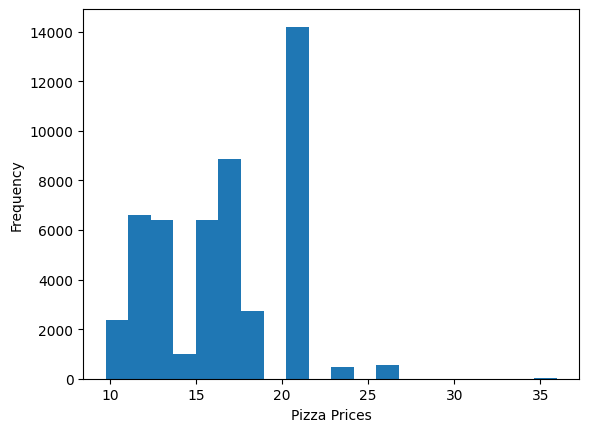

In [10]:
import matplotlib.pyplot as plt
df["price"].plot(kind="hist",bins=20)
plt.xlabel("Pizza Prices")
plt.show()

In [11]:
df.head()

,id,date,time,name,size,type,price
X,,,,,,,
1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


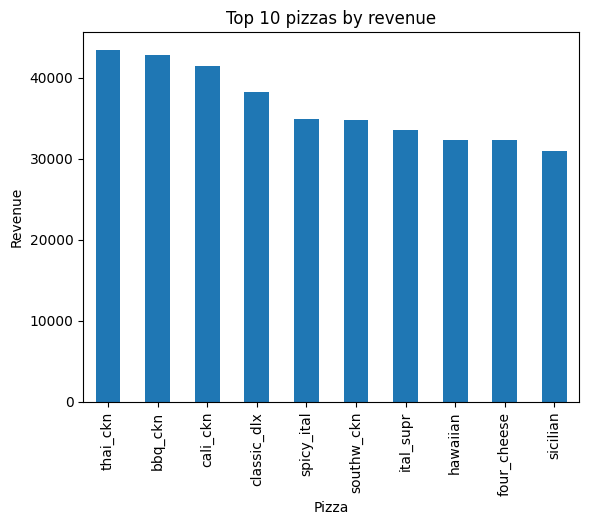

In [12]:
names_prices = df.groupby("name")["price"].sum().sort_values(ascending=False).head(10)

names_prices.plot(kind="bar")
plt.title("Top 10 pizzas by revenue")
plt.xlabel("Pizza")
plt.ylabel("Revenue")
plt.show()


<Axes: ylabel='count'>

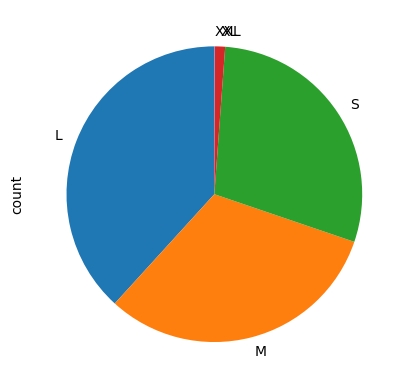

In [13]:
size = df["size"].value_counts()
size.plot(kind="pie", startangle=90)

<Axes: ylabel='id'>

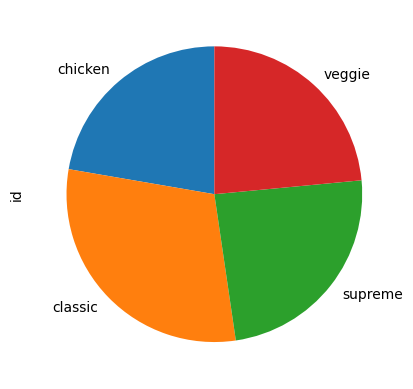

In [14]:
type = df.groupby("type")["id"].count()

type.plot(kind="pie", startangle=90)

In [15]:
df["date"].sort_values(ascending=False).head(10)

X
49574   2015-12-31
49440   2015-12-31
49460   2015-12-31
49459   2015-12-31
49458   2015-12-31
49457   2015-12-31
49456   2015-12-31
49455   2015-12-31
49454   2015-12-31
49453   2015-12-31
Name: date, dtype: datetime64[ns]

<Axes: xlabel='date'>

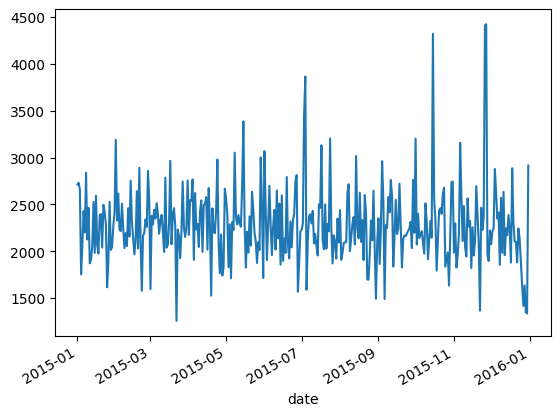

In [16]:
year_rev = df.groupby("date")["price"].sum()

year_rev.plot(kind="line")

In [17]:
df["Month"] = df["date"].dt.month

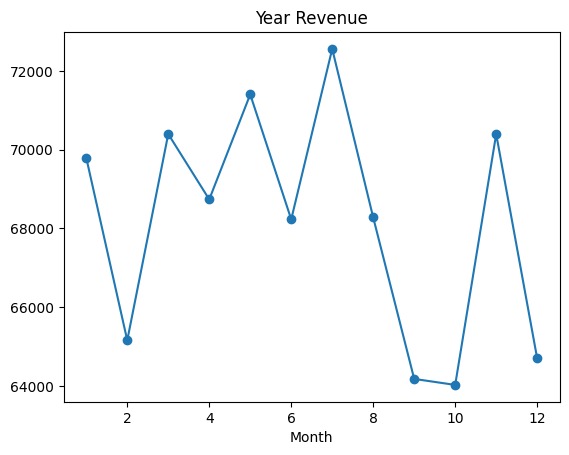

In [18]:
month_rev = df.groupby("Month")["price"].sum()

month_rev.plot(kind="line", marker="o", title="Year Revenue")
plt.show()